<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2024/blob/main/notes/24-penroselucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 24: Are you smarter than a computer? (optional)

In [ ]:
#@title Setup
!pip install -qqq tock
from tock import *
!test -x /content/theory || git clone --quiet https://github.com/ND-CSE-30151/spring-2024 /content/theory
%cd -q /content/theory/notes
from IPython.display import IFrame, HTML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.5/536.5 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Turing machines were invented as a model of what it means for *humans*, not computing machines, to compute, and so a natural question is, can Turing machines serve as a model for *all* human reasoning? I want to present to you one argument for the "no" position. Turing called it "the mathematical objection," and while some form of it goes back to Gödel, it is usually known today as the Penrose-Lucas argument. This version, which is an interesting variation on the diagonalization argument for the undecidability of the halting problem, is due to Penrose and comes from [an article criticizing him](http://www.ihmc.us/users/phayes/pub/lafortehayesford.pdf). Although I agree with the conclusion, I don't agree with the argument -- what do you think about it?

Let $R$ be a "partial loop-snooper," a decider TM that detects _some_ cases of looping. That is, on input $\langle M, w\rangle$, if $R$ accepts, then $M$ definitely loops on input $w$. But if $R$ rejects, then $M$ might or might not loop on input $w$.

Now we go through the usual diagonalization argument, but this diagonalization argument doesn't lead to a contradiction; instead, it produces a machine/input pair that is beyond $R$'s detection abilities. Assume an ordering $M_1, M_2, \ldots$ on Turing machines and an ordering $w^{(1)}, w^{(2)}, \ldots$ on strings. We can build a big table with the results of $R$ on all machines and inputs:

| | $\varepsilon$ | $\mathtt{0}$ |$\mathtt{1}$ | $\mathtt{00}$ | $\cdots$ |
|:-|:------------|:-----------|:------------|:------------|:-------|
|$M_1$| _don't know_ | _loops_ | _don't know_ | _loops_    |        |
|$M_2$| _don't know_ | _loops_ | _loops_ | _don't know_    |        |
|$M_3$| _loops_ | _don't know_ | _loops_ | _don't know_ |  |
|$M_4$| _don't know_ | _don't know_ | _don't know_ | _loops_ |                |
|$\vdots$| | | | | | |

We define $D$ to be the Turing machine that _does_ the opposite of the diagonal of this table. That is, on input $w$:

1. Find $i$ such that $w = w^{(i)}$.
2. Run $R$, the partial loop-snooper, on $\langle M_i, w^{(i)}\rangle$.
3. If $R$ detected an infinite loop, _accept_.
4. Otherwise, go into an infinite loop.

Now, there must be an $i$ such that $D = M_i$. What happens when we run $D$ on $w^{(i)}$?

- For if $R$ accepts $\langle D, w^{(i)}\rangle$, then $D$ must not loop on $w^{(i)}$, but that would be a contradiction.
- But if $R$ rejects $\langle D, w^{(i)}\rangle$, then $D$ must loop on $w^{(i)}$, which is *not* a contradiction.

So, in fact, $D$ does loop on $w^{(i)}$, but $R$ does not detect it.

| | $\varepsilon$ | $\mathtt{0}$ |$\mathtt{1}$ | $\mathtt{00}$ | $\cdots$ | $w^{(i)}$ |
|:-|:------------|:-----------|:------------|:------------|:-------|:---|
|$M_1$| _don't know_ | _loops_ | _don't know_ | _loops_    | $\cdots$ | _loops_ |
|$M_2$| _don't know_ | _loops_ | _loops_ | _don't know_    | $\cdots$ | _don't know_ |
|$M_3$| _loops_ | _don't know_ | _loops_ | _don't know_ | $\cdots$ | _don't know_ |
|$M_4$| _don't know_ | _don't know_ | _don't know_ | _loops_ | $\cdots$ | _don't know_ |
|$\vdots$| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\ddots$ | $\vdots$ |
|$D=M_i$| _loops_ | _loops_ | _don't know_ | _don't know_ | $\cdots$ | **don't know** |

It's critical that you understand the argument thus far before moving on.

One example of a partial loop snooper is you: You're able to detect some cases of looping, like


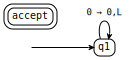

In [ ]:
read_csv('tm-loop.csv')


Now, suppose that you are equivalent to a Turing machine. Since you have a partial ability to detect looping, it should be possible to construct a Turing machine $Y$ that accepts $\langle M, w\rangle$ in exactly those cases when you are able to detect that $M$ loops on input $w$.

Then, by the above argument, there is a machine/input pair $\langle D, w^{(i)}\rangle$ that loops, but $Y$ rejects it. Therefore, by the definition of $Y$, you are also not able to detect that $\langle D, w^{(i)}\rangle$ loops.

But if you understood the above argument, then you know that $\langle D, w^{(i)}\rangle$ does loop. This is a contradiction! Therefore, congratulations! You are not equivalent to a Turing machine.